# Data Wrangling
## Introduction
An explorative analysis on the country and states in the US affected by the Deferred Action for Childhood Arrivals (DACA). To study and analyze the impact of DACA and recent trends as per the last four quarters in 2017.

## How data is collected?

- Data will be collected from the USCIS link for the 2017 and 2016.

- All data will be converted from PDF to excel data.

- Data will be divided into four parts – Case status, Country Status, States Status and 2017 Status

## Common Problems Found in Datasets

- Inconsistent column names
- Missing Data
- Outliners
- Duplicate rows
- Untidy
- Need to process columns
- Column type signal unexpected data values

Let’s go over each problem and what I did to wrangle the data.

### Inconsistent column names 
Downloaded the pdf from the USCIS site and convert that into excel sheet using an online tool. Now the headings are inconsistent with title case, uppercase and some space. Load the data into pandas and checked how inconsistent the column headers using columns(). All examples shown below.

In [1]:
import pandas as pd
df = pd.read_excel('data/2017-status.xls',header=1)
df.columns

Index(['Quarter', 'Type', 'Accepted', 'Rejected', 'Received', 'Average',
       'Approved', 'Denied', 'Pending'],
      dtype='object')

In [2]:
import pandas as pd
df = pd.read_excel('data/case-status.xls',header=1)
df.columns

Index(['Year', 'Type', 'Accepted', 'Rejected', 'Received', 'Average',
       'Biometrics', 'Review', 'Approved', 'Denied', 'Pending'],
      dtype='object')

In [3]:
import pandas as pd
df = pd.read_excel('data/country-status.xls',header=1)
df.columns

Index(['Country', 'Initials-Accepted', 'Initials-Approved',
       'Renewals-Accepted', 'Renewals-Approved', 'Total-Accepted',
       'Total-Approved'],
      dtype='object')

In [4]:
import pandas as pd
df = pd.read_excel('data/us-states-summary.xls',header=1)
df.columns

Index(['State', 'Initials-Accepted', 'Initials-Approved', 'Renewals-Accepted',
       'Renewals-Approved', 'Total-Accepted', 'Total-Approved'],
      dtype='object')

### Missing data
Using shape() functionality checked the states summary to see whether any data is missing. As you see below the number of states returned is 61 with 7 columns. On investigating further found out there was some null rows, one row with state name as ‘missing’ and few other rows with values which are not states of US but considered as region.


In [5]:
df.shape

(61, 7)

|![image](https://raw.githubusercontent.com/sunilayyaps/datascience/master/capstone-project1/DataCleaning/images/Picture1.png)|![image](https://raw.githubusercontent.com/sunilayyaps/datascience/master/capstone-project1/DataCleaning/images/Picture2.png)|![image](https://raw.githubusercontent.com/sunilayyaps/datascience/master/capstone-project1/DataCleaning/images/Picture3.png)|
|------|------|
|     | |

### Checking data types for all data
Using info() to get additional information about each dataset. On examining the results found that case-status datasets has total of 10 rows but column Biometrics scheduled and request under review had only 2 values. So there were 8 missing values. Also in the same data sets noticed that these two columns are of datatype float64 and Denied column is object data type which will be treated like string. Denied column should have been int64 datatype.


In [6]:
import pandas as pd
df = pd.read_excel('data/2017-status.xls',header=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
Quarter     8 non-null object
Type        8 non-null object
Accepted    8 non-null int64
Rejected    8 non-null int64
Received    8 non-null int64
Average     8 non-null int64
Approved    8 non-null int64
Denied      8 non-null int64
Pending     8 non-null int64
dtypes: int64(7), object(2)
memory usage: 656.0+ bytes


In [7]:
import pandas as pd
df = pd.read_excel('data/case-status.xls',header=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
Year          10 non-null int64
Type          10 non-null object
Accepted      10 non-null int64
Rejected      10 non-null int64
Received      10 non-null int64
Average       10 non-null int64
Biometrics    2 non-null float64
Review        2 non-null float64
Approved      10 non-null int64
Denied        10 non-null int64
Pending       10 non-null int64
dtypes: float64(2), int64(8), object(1)
memory usage: 960.0+ bytes


In [8]:
import pandas as pd
df = pd.read_excel('data/country-status.xls',header=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
Country              25 non-null object
Initials-Accepted    25 non-null int64
Initials-Approved    25 non-null int64
Renewals-Accepted    25 non-null int64
Renewals-Approved    25 non-null int64
Total-Accepted       25 non-null int64
Total-Approved       25 non-null int64
dtypes: int64(6), object(1)
memory usage: 1.4+ KB


In [9]:
import pandas as pd
df = pd.read_excel('data/us-states-summary.xls',header=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
State                61 non-null object
Initials-Accepted    61 non-null int64
Initials-Approved    61 non-null int64
Renewals-Accepted    61 non-null int64
Renewals-Approved    61 non-null int64
Total-Accepted       61 non-null int64
Total-Approved       61 non-null int64
dtypes: int64(6), object(1)
memory usage: 3.4+ KB


### Detect Outliers using Data visualization
Using histogram checked the number of approved case status for all the cases and the number does look fine. 


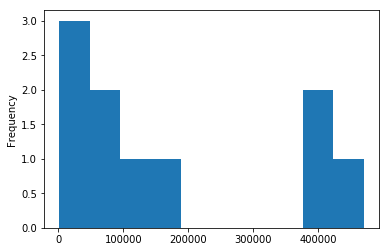

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('data/case-status.xls',header=1)
df.Approved.plot('hist')
plt.show()

### PIVOT: UN-MELTING DATA
The raw data provided by the USCIS website was not normalized. So, I had to normalize the data while converting it into excel. This was done prior to importing the dataset in python. But I had to pivot the data to group by year to convert the data from Analysis friendly shape to reporting friendly shape.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('data/2017-status.xls',header=1)
df.boxplot(column='Approved',by='Quarter')
plt.show

<function matplotlib.pyplot.show>